In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from itertools import cycle, islice, product
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import homogeneity_completeness_v_measure, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.mixture import GaussianMixture

In [2]:
dataset = pd.read_csv('./diamonds.csv')
dataset.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [4]:
dataset.cut.replace("b'Fair'",1,inplace=True)
dataset.cut.replace("b'Good'",2,inplace=True)
dataset.cut.replace("b'Very Good'",3,inplace=True)
dataset.cut.replace("b'Ideal'",4,inplace=True)
dataset.cut.replace("b'Premium'",5,inplace=True)
dataset.clarity.replace("b'I1'",1,inplace=True)
dataset.clarity.replace("b'IF'",2,inplace=True)
dataset.clarity.replace("b'SI1'",3,inplace=True)
dataset.clarity.replace("b'SI2'",4,inplace=True)
dataset.clarity.replace("b'VS1'",5,inplace=True)
dataset.clarity.replace("b'VS2'",6,inplace=True)
dataset.clarity.replace("b'VVS1'",7,inplace=True)
dataset.clarity.replace("b'VVS2'",8,inplace=True)
dataset.color.replace("b'J'",1,inplace=True)
dataset.color.replace("b'I'",2,inplace=True)
dataset.color.replace("b'H'",3,inplace=True)
dataset.color.replace("b'G'",4,inplace=True)
dataset.color.replace("b'F'",5,inplace=True)
dataset.color.replace("b'E'",6,inplace=True)
dataset.color.replace("b'D'",7,inplace=True)

In [5]:
dataset.describe()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.760234,4.405803,4.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.026956,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,5.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,6.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
D1 = pd.DataFrame(data=dataset, columns=["carat","cut","color","clarity", 
#                                          "price"
                                        ])
D1

,carat,cut,color,clarity,price
0,0.23,4,6,4,326.0
1,0.21,5,6,3,326.0
2,0.23,2,6,5,327.0
3,0.29,5,2,6,334.0
4,0.31,2,1,4,335.0
...,...,...,...,...,...
53935,0.72,4,7,3,2757.0
53936,0.72,2,7,3,2757.0
53937,0.70,3,7,3,2757.0
53938,0.86,5,3,4,2757.0


In [8]:
pca = PCA(n_components=2)
D2 = pca.fit_transform(D1)
print('Доля объясненной дисперсии: {}, сумма = {}'.format(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)))

Доля объясненной дисперсии: [9.99999569e-01 1.87484370e-07], сумма = 0.9999997568231442


In [13]:
D2

array([[-3.60679984e+03,  5.19267734e-01],
       [-3.60679980e+03,  1.42525550e+00],
       [-3.60579989e+03, -3.36089323e-01],
       ...,
       [-1.17579986e+03,  1.14403978e+00],
       [-1.17579957e+03,  1.19135368e+00],
       [-1.17579988e+03,  1.36182938e-01]])

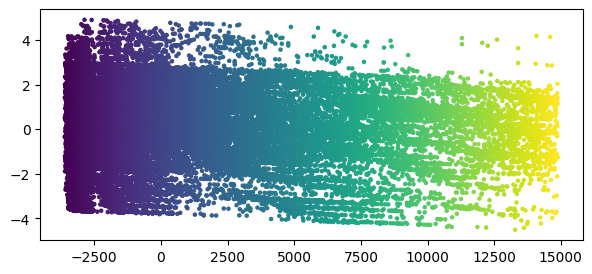

In [19]:
plt.figure(figsize=(7,3))
plt.scatter(D2[:, 0], D2[:, 1], s=5, c=dataset["price"])
plt.show()

In [20]:
tsne = TSNE(n_components=2)
D3 = tsne.fit_transform(D1)

In [22]:
D3

array([[-99.95393 ,  52.233295],
       [-99.95432 ,  52.232067],
       [-99.95128 ,  52.242924],
       ...,
       [ 13.324661,   8.95497 ],
       [ 12.248414,   9.043625],
       [ 13.259779,   9.016452]], dtype=float32)

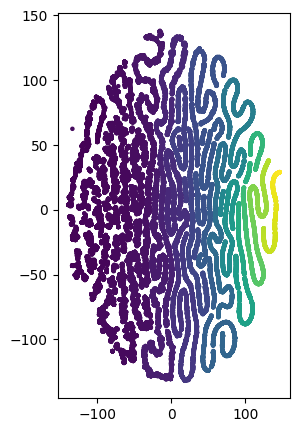

In [21]:
plt.figure(figsize=(3,5))
plt.scatter(D3[:, 0], D3[:, 1], s=5, c=dataset["price"])
plt.show()

In [23]:
#############
#############
#############
#############
#############

In [24]:
def do_clustering(cluster_datasets, method):
    """
    Выполнение кластеризации для данных примера
    """
    cluster_results = []
    for X in cluster_datasets:
        temp_cluster = method.fit_predict(X)
        cluster_results.append(temp_cluster)
    return cluster_results

In [25]:
def visualize_clusters(cluster_datasets, cluster_results):
    """
    Визуализация результатов кластерного анализа
    """
    plt.subplots(figsize=(10,7))
    plot_num = 0
    for X, y_pred in zip(cluster_datasets, cluster_results):
        plot_num += 1
        plt.subplot(2, 3, plot_num)
        # Цвета точек как результат кластеризации
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # черный цвет для выделяющихся значений
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=3, color=colors[y_pred])
#         plt.xlim(-2.5, 2.5)
#         plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.title(datasets_names[plot_num-1])
    
    plt.show()

In [26]:
cluster_datasets = [D2, D3]
cluster_datasetD1 = [D1]
# cluster_datasets23 = [D2, D3]
datasets_names = ['D2', 'D3']

In [32]:
%time result_KMeans_3 = do_clustering(cluster_datasets, KMeans(n_clusters=15))

D:\Projects\python\ml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Projects\python\ml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CPU times: total: 8.8 s
Wall time: 784 ms


C:\Users\Necron\AppData\Local\Temp\ipykernel_15772\1332039804.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, plot_num)


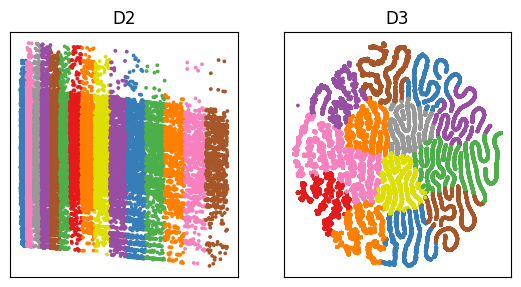

In [33]:
visualize_clusters(cluster_datasets, result_KMeans_3)

In [34]:
result_KMeans_3

[array([ 0,  0,  0, ..., 14, 14, 14]), array([5, 5, 5, ..., 6, 6, 6])]

In [35]:
%time result_KMeans_3_D1 = do_clustering(cluster_datasetD1, KMeans(n_clusters=15))

D:\Projects\python\ml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CPU times: total: 3.45 s
Wall time: 341 ms


In [36]:
result_KMeans_3_D1

[array([ 5,  5,  5, ..., 10, 10, 10])]

In [38]:
# Для D1
adjusted_rand_score(dataset["price"], result_KMeans_3_D1[0])

0.005373500940131153

In [39]:
# Для D2
adjusted_rand_score(dataset["price"], result_KMeans_3[0])

0.0053965318273960635

In [40]:
# Для D3
adjusted_rand_score(dataset["price"], result_KMeans_3[1])

0.009290434995437552

In [43]:
h1, c1, v1 = homogeneity_completeness_v_measure(dataset["price"], result_KMeans_3_D1[0])
h1, c1, v1

(0.27762103439367836, 1.0, 0.43459058190197875)

In [44]:
# Для D2
h2, c2, v2 = homogeneity_completeness_v_measure(dataset["price"], result_KMeans_3[0])
h2, c2, v2

(0.27804968363535526, 1.0000000000000002, 0.43511560965995527)

In [45]:
h3, c3, v3 = homogeneity_completeness_v_measure(dataset["price"], result_KMeans_3[1])
h3, c3, v3

(0.3099957785949488, 0.9946875753436415, 0.47268013107782403)

In [46]:
# Для D1
sscore1 = silhouette_score(cluster_datasetD1[0], result_KMeans_3_D1[0])
sscore1

0.553361250395661

In [47]:
# Для D2
sscore2 = silhouette_score(cluster_datasets[0], result_KMeans_3[0])
sscore2

0.5533198253383267

In [48]:
# Для D3
sscore3 = silhouette_score(cluster_datasets[1], result_KMeans_3[1])
sscore3

0.33579364

In [49]:
#############
#############
#############
#############
#############

In [50]:
%time result_DBSCAN = do_clustering(cluster_datasets, DBSCAN(eps=4, min_samples=5))

CPU times: total: 703 ms
Wall time: 705 ms


C:\Users\Necron\AppData\Local\Temp\ipykernel_15772\1332039804.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, plot_num)


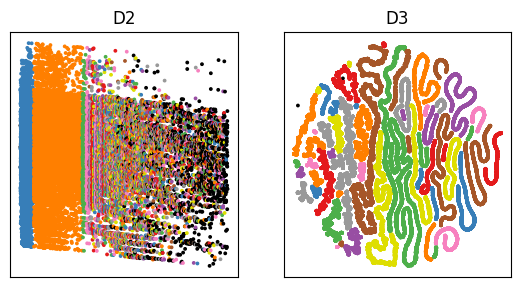

In [51]:
visualize_clusters(cluster_datasets, result_DBSCAN)

In [52]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [79]:
%%time
eps_search_values = np.arange(0.02, 0.6, 0.02)
min_pts_search_values = np.arange(2, 50, 2)
segm_pars = list(product(eps_search_values, min_pts_search_values))
# segm_pars
checked_eps = []
checked_min_pts = []
clusters_cnt = []
for i in segm_pars:
    search_clustering = DBSCAN(eps=i[0], min_samples=i[1], algorithm='ball_tree').fit(D1)
    checked_eps.append(i[0])
    checked_min_pts.append(i[1])
    clusters_cnt.append(len(np.unique(search_clustering.labels_)))
zipped_data = list(zip(checked_eps, checked_min_pts, clusters_cnt))
check_df = pd.DataFrame(zipped_data, columns=['eps', 'min_pts', 'clusters_cnt'])
check_df

CPU times: total: 1min 34s
Wall time: 1min 34s


,eps,min_pts,clusters_cnt
0,0.02,2,5916
1,0.02,4,1472
2,0.02,6,698
3,0.02,8,407
4,0.02,10,264
5,0.02,12,168
6,0.02,14,125
7,0.02,16,78
8,0.02,18,61
9,0.02,20,44


In [80]:
check_df_31 = check_df[check_df['clusters_cnt']>10]
check_df_3 = check_df_31[check_df_31['clusters_cnt']<20]
check_df_3

,eps,min_pts,clusters_cnt
13,0.02,28,18
14,0.02,30,15
37,0.04,28,18
38,0.04,30,15
39,0.04,32,11
61,0.06,28,18
62,0.06,30,15
63,0.06,32,11
85,0.08,28,18
86,0.08,30,15


In [81]:
%time result_DBSCAN_D1 = do_clustering(cluster_datasetD1, DBSCAN(eps=0.42, min_samples=30))

CPU times: total: 391 ms
Wall time: 383 ms


In [82]:
result_DBSCAN_D1[0]

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [83]:
# Для D1
adjusted_rand_score(milk_y_ds_le, result_DBSCAN_D1[0])

-1.4120891429380089e-05

In [84]:
# Для D1
h1_DBSCAN, c1_DBSCAN, v1_DBSCAN = homogeneity_completeness_v_measure(dataset["price"], result_DBSCAN_D1[0])
h1_DBSCAN, c1_DBSCAN, v1_DBSCAN

(0.00728078684373485, 0.8310824967865728, 0.014435113337645319)

In [85]:
%%time
eps_search_values = np.arange(0.02, 0.6, 0.02)
min_pts_search_values = np.arange(2, 50, 2)
segm_pars = list(product(eps_search_values, min_pts_search_values))
# segm_pars
checked_eps = []
checked_min_pts = []
clusters_cnt = []
for i in segm_pars:
    search_clustering = DBSCAN(eps=i[0], min_samples=i[1], algorithm='ball_tree').fit(D2)
    checked_eps.append(i[0])
    checked_min_pts.append(i[1])
    clusters_cnt.append(len(np.unique(search_clustering.labels_)))
zipped_data = list(zip(checked_eps, checked_min_pts, clusters_cnt))
check_df = pd.DataFrame(zipped_data, columns=['eps', 'min_pts', 'clusters_cnt'])
check_df

CPU times: total: 1min 17s
Wall time: 1min 17s


,eps,min_pts,clusters_cnt
0,0.02,2,6409
1,0.02,4,1534
2,0.02,6,726
3,0.02,8,416
4,0.02,10,273
5,0.02,12,171
6,0.02,14,127
7,0.02,16,78
8,0.02,18,61
9,0.02,20,45


In [86]:
check_df_31 = check_df[check_df['clusters_cnt']>10]
check_df_3 = check_df_31[check_df_31['clusters_cnt']<20]
check_df_3

,eps,min_pts,clusters_cnt
13,0.02,28,18
14,0.02,30,15
15,0.02,32,11
37,0.04,28,19
38,0.04,30,16
39,0.04,32,12
69,0.06,44,18
70,0.06,46,14
71,0.06,48,11
93,0.08,44,18


In [73]:
cluster_datasetD2 = [D2]

In [101]:
%time result_DBSCAN_D2 = do_clustering(cluster_datasetD2, DBSCAN(eps=0.6, min_samples=6))

CPU times: total: 266 ms
Wall time: 235 ms


C:\Users\Necron\AppData\Local\Temp\ipykernel_15772\1332039804.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, plot_num)


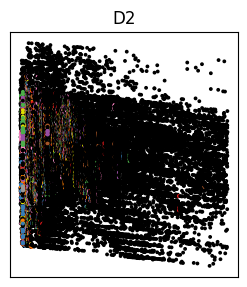

In [102]:
visualize_clusters(cluster_datasetD2, result_DBSCAN_D2)

In [109]:
# Для D2
h2_DBSCAN, c2_DBSCAN, v2_DBSCAN = homogeneity_completeness_v_measure(dataset["price"], result_DBSCAN_D2[0])
h2_DBSCAN, c2_DBSCAN, v2_DBSCAN

(0.32020431685693546, 0.8951103208612256, 0.47167734166537634)

In [106]:
%%time
eps_search_values_sil3 = np.arange(0.1, 2, 0.02)
min_pts_search_values_sil3 = np.arange(10, 50, 2)
segm_pars_sil3 = list(product(eps_search_values_sil3, min_pts_search_values_sil3))
# segm_pars_sil3
checked_eps_sil3 = []
checked_min_pts_sil3 = []
clusters_cnt_sil3 = []
sil_score3 = []
for i in segm_pars_sil3:
    search_clustering_sil3 = DBSCAN(eps=i[0], min_samples=i[1], algorithm='ball_tree').fit(D3)
    checked_eps_sil3.append(i[0])
    checked_min_pts_sil3.append(i[1])
    clusters_cnt_sil3.append(len(np.unique(search_clustering_sil3.labels_)))
    sil_score3.append(metrics.silhouette_score(D3, search_clustering_sil3.labels_))
zipped_data_sil3 = list(zip(checked_eps_sil3, checked_min_pts_sil3, clusters_cnt_sil3, sil_score3))
check_df_sil3 = pd.DataFrame(zipped_data_sil3, columns=['eps', 'min_pts', 'clusters_cnt', 'sil_score'])
check_df_sil3

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [107]:
cluster_datasetD3 = [D3]

CPU times: total: 1.48 s
Wall time: 1.48 s


C:\Users\Necron\AppData\Local\Temp\ipykernel_15772\1332039804.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, plot_num)


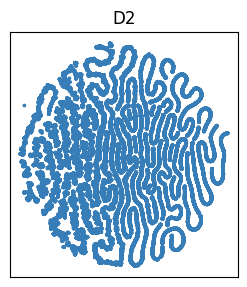

In [108]:
# 20.5, 40
%time result_DBSCAN_D3 = do_clustering(cluster_datasetD3, DBSCAN(eps=20.5, min_samples=40))
visualize_clusters(cluster_datasetD3, result_DBSCAN_D3)

In [110]:
# Для D3
adjusted_rand_score(dataset["price"], result_DBSCAN_D3[0])

0.0

In [111]:
# Для D3
h3_DBSCAN, c3_DBSCAN, v3_DBSCAN = homogeneity_completeness_v_measure(milk_y_ds_le, result_DBSCAN_D3[0])
h3_DBSCAN, c3_DBSCAN, v3_DBSCAN

(0.0, 1.0, 0.0)

In [112]:
#############
#############
#############
#############
#############

In [113]:
%time result_GaussianMixtureD1 = do_clustering(cluster_datasetD1, GaussianMixture(n_components=15))

CPU times: total: 6.2 s
Wall time: 4.11 s


In [117]:
# Для D1
adjusted_rand_score(dataset["price"], result_GaussianMixtureD1[0])

0.0030699879750749233

In [118]:
# Для D1
h1_Gaus, c1_Gaus, v1_Gaus = homogeneity_completeness_v_measure(milk_y_ds_le, result_GaussianMixtureD1[0])
h1_Gaus, c1_Gaus, v1_Gaus

(0.20162931228212388, 0.7730351828849117, 0.3198363192008109)

CPU times: total: 2.14 s
Wall time: 825 ms


C:\Users\Necron\AppData\Local\Temp\ipykernel_15772\1332039804.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, plot_num)


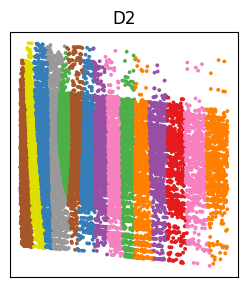

In [119]:
%time result_GaussianMixtureD2 = do_clustering(cluster_datasetD2, GaussianMixture(n_components=15))
visualize_clusters(cluster_datasetD2, result_GaussianMixtureD2)

In [125]:
# Для D2
adjusted_rand_score(dataset["price"], result_GaussianMixtureD2[0])

0.0034841863151475146

In [126]:
# Для D2
h2_Gaus, c2_Gaus, v2_Gaus = homogeneity_completeness_v_measure(milk_y_ds_le, result_GaussianMixtureD2[0])
h2_Gaus, c2_Gaus, v2_Gaus

(0.24318286270745645, 0.9385671354422527, 0.3862804200505176)

CPU times: total: 1.33 s
Wall time: 120 ms


C:\Users\Necron\AppData\Local\Temp\ipykernel_15772\1332039804.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, plot_num)


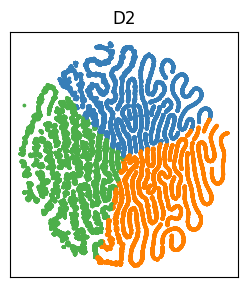

In [127]:
%time result_GaussianMixtureD3 = do_clustering(cluster_datasetD3, GaussianMixture(n_components=3))
visualize_clusters(cluster_datasetD3, result_GaussianMixtureD3)

In [128]:
# Для D3
adjusted_rand_score(dataset["price"], result_GaussianMixtureD3[0])

0.0013616632537454842

In [129]:
# Для D3
h3_Gaus, c3_Gaus, v3_Gaus = homogeneity_completeness_v_measure(milk_y_ds_le, result_GaussianMixtureD3[0])
h3_Gaus, c3_Gaus, v3_Gaus

(0.12611723351230036, 0.9953356486068795, 0.22386848421355338)